colab 에서 gutenberg 패키지를 사용하기 위해서는, libdb5.3-dev 선행 설치가 필요하다.

In [0]:
!sudo apt install libdb5.3-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
Suggested packages:
  db5.3-doc
The following NEW packages will be installed:
  libdb5.3-dev
0 upgraded, 1 newly installed, 0 to remove and 10 not upgraded.
Need to get 762 kB of archives.
After this operation, 3,146 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libdb5.3-dev amd64 5.3.28-13.1ubuntu1 [762 kB]
Fetched 762 kB in 1s (670 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: 

In [0]:
!pip3 install --upgrade setuptools
!pip3 install gutenberg

Requirement already up-to-date: setuptools in /usr/local/lib/python3.6/dist-packages (40.8.0)
    100% |████████████████████████████████| 245kB 9.8MB/s 
    100% |████████████████████████████████| 348kB 24.2MB/s 
    100% |████████████████████████████████| 1.0MB 18.5MB/s 
    100% |████████████████████████████████| 51kB 22.3MB/s 
    100% |████████████████████████████████| 573kB 25.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/8e/cd/75/4bc6f16541a1b7a69b02168da567695b2271c23ac4a0a0a453
  Stored in directory: /root/.cache/pip/wheels/11/b8/b3/fa84db10bf8c563e4ba1a72837a0946d123f12adb34b164bf5
  Stored in directory: /root/.cache/pip/wheels/a0/bc/74/834fa0c75c4ae6d6718db5e65187d508623ee291dead032156
  Stored in directory: /root/.cache/pip/wheels/15/35/25/dbcb848832ccb1a4b4ad23f529badfd3bce9bf88017f7ca510
Successfully built gutenberg bsddb3 alembic Mako


In [0]:
!pwd

/content


시간 절약을 위해, gutenberg db file 들을 미리 다운로드 받아놓고, google drive 를 mount 하여 연결한다.

* gutenberg db file 다운로드: https://drive.google.com/drive/folders/1Y6nMqJ-srDfflTuoniVdEzdWfkrShe4T

*   gutenberg db file  기본 경로 : ~/gutenberg_data/metadata/metadata.db

colab 상에서는, /content/gutenberg_data/metadata/metadata.db 에 위치하면 됨

In [0]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# unmount 를 원할 시 실행

#!fusermount -u gdrive
#!rmdir gdrive

fusermount: failed to unmount /content/gutenberg_data: Invalid argument


/content/gdrive 에 google drive 를 mount 하고,

 구글 드라이브 상의 /gutenberg/gutenberg_data 를 
 /content/gutenberg_data 위치로 symbolic link 연결한다


In [0]:
!ln -s /content/gdrive/My\ Drive/gutenberg/gutenberg_data /content/gutenberg_data

In [0]:
!ls -al /content/gutenberg_data/metadata/metadata.db

total 3697408
-rw------- 1 root root     16384 Mar  2 03:05  contexts
-rw------- 1 root root 909377536 Mar  2 03:05 'c^o^s^p^'
-rw------- 1 root root 942211072 Mar  2 03:05 'c^p^o^s^'
-rw------- 1 root root 915693568 Mar  2 03:06 'c^s^p^o^'
-rw------- 1 root root    999424 Mar  2 03:05  __db.001
-rw------- 1 root root   1441792 Mar  2 03:06  __db.002
-rw------- 1 root root  65544192 Mar  2 03:06  __db.003
-rw------- 1 root root 285048832 Mar  2 03:06  i2k
-rw------- 1 root root 665780224 Mar  2 03:06  k2i
-rw------- 1 root root     16384 Mar  2 03:05  namespace
-rw------- 1 root root     16384 Mar  2 03:05  prefix


In [0]:
try:
    GUTENBERG = True
    from gutenberg.acquire import load_etext
    from gutenberg.query import get_etexts, get_metadata
    from gutenberg.acquire import get_metadata_cache
    from gutenberg.acquire.text import UnknownDownloadUriException
    from gutenberg.cleanup import strip_headers
    from gutenberg._domain_model.exceptions import CacheAlreadyExistsException
except ImportError:
    GUTENBERG = False
    print('Gutenberg is not installed. See instructions at https://pypi.python.org/pypi/Gutenberg')
#import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import TimeDistributed
import tensorflow.keras.callbacks
import tensorflow.keras.backend as K
import scipy.misc
import json

import os, sys
import re
import PIL
from PIL import ImageDraw

from tensorflow.keras.optimizers import RMSprop
import random
import numpy as np
import tensorflow as tf
from keras.utils import get_file

from IPython.display import clear_output, Image, display, HTML
try:
    from io import BytesIO
except ImportError:
    from StringIO import StringIO as BytesIO

Using TensorFlow backend.


미리 db 데이터를 넣어 놓아도,  cache.populate() 시 메타 데이타 땡겨오는데 시간이 꽤 걸린다.

꼼수가 있는데, 애로 코드블럭을 run 하고 바로 stop 하면 메타데이타(get_metadata) 검색은 잘 안되지만,


실제 텍스트 데이터 로드(load_etext) 는 잘 실행된다.

In [0]:
if GUTENBERG:
    cache = get_metadata_cache()
    try:
        cache.populate()
    except CacheAlreadyExistsException as e:
        print(e)
        pass

KeyboardInterrupt: ignored

서적 ID를 기반으로 실제 서적 데이터를 땡겨온다.


100 : 세익스피어 전집(희곡)

2981 : 카사노바 회고집(에세이)

[9296, 9798, 9881, 10462, 10799, 11364, 11889, 12180, 12398] : clarissa (여러 편의 편지 형태)


학습 텍스트는 원본에서 목차 등 불필요한 텍스트를 발라내게 된다. (text.split 부분)

In [0]:
shakespeare_id = 100
casanova_id = 2981 
clarissa_ids = [9296, 9798, 9881, 10462, 10799, 11364, 11889, 12180, 12398]

def load_etext_from(ids, filter_func):
  etext = '\n'.join([filter_func(strip_headers(load_etext(id))) \
                     for id in ids])
  return etext

In [0]:
shakespeare = load_etext_from([shakespeare_id], lambda text: text.split('\nTHE END', 1)[-1])
print(len(shakespeare))
shakespeare[:1000]

5528070


'\n\n\n\nALL’S WELL THAT ENDS WELL\n\n\nby William Shakespeare\n\n\n\nContents\n\nACT I\nScene I. Rossillon. A room in the Countess’s palace.\nScene II. Paris. A room in the King’s palace.\nScene III. Rossillon. A Room in the Palace.\n\n\nACT II\nScene I. Paris. A room in the King’s palace.\nScene II. Rossillon. A room in the Countess’s palace.\nScene III. Paris. The King’s palace.\nScene IV. Paris. The King’s palace.\nScene V. Another room in the same.\n\n\nACT III\nScene I. Florence. A room in the Duke’s palace.\nScene II. Rossillon. A room in the Countess’s palace.\nScene III. Florence. Before the Duke’s palace.\nScene IV. Rossillon. A room in the Countess’s palace.\nScene V. Without the walls of Florence.\nScene VI. Camp before Florence.\nScene VII. Florence. A room in the Widow’s house.\n\n\nACT IV\nScene I. Without the Florentine camp.\nScene II. Florence. A room in the Widow’s house.\nScene III. The Florentine camp.\nScene IV. Florence. A room in the Widow’s house.\nScene V. Ros

In [0]:
casanova = load_etext_from([casanova_id], lambda text: text.split('\nCASANOVA AT DUX', 1)[-1]) # from main contents
print(len(casanova))
casanova[:1000]

6685264


'\n\n An Unpublished Chapter of History, By Arthur Symons\n\n I\n The Memoirs of Casanova, though they have enjoyed the popularity of a bad reputation, have never had justice done to them by serious students of literature, of life, and of history. One English writer, indeed, Mr. Havelock Ellis, has realised that ‘there are few more delightful books in the world,’ and he has analysed them in an essay on Casanova, published in Affirmations, with extreme care and remarkable subtlety. But this essay stands alone, at all events in English, as an attempt to take Casanova seriously, to show him in his relation to his time, and in his relation to human problems. And yet these Memoirs are perhaps the most valuable document which we possess on the society of the eighteenth century; they are the history of a unique life, a unique personality, one of the greatest of autobiographies; as a record of adventures, they are more entertaining than Gil Blas, or Monte Cristo, or any of the imaginary travel

In [0]:
clarissa = load_etext_from(clarissa_ids, lambda text: text.split('\nTHE HISTORY OF CLARISSA HARLOWE', 1)[-1]) # from main contents
print(len(clarissa))
clarissa[:1000]

5173348


"\n\n\n\n\nLETTER I\n\nMISS ANNA HOWE, TO MISS CLARISSA HARLOWE JAN 10.\n\n\nI am extremely concerned, my dearest friend, for the disturbances that\nhave happened in your family. I know how it must hurt you to become\nthe subject of the public talk: and yet, upon an occasion so generally\nknown, it is impossible but that whatever relates to a young lady, whose\ndistinguished merits have made her the public care, should engage every\nbody's attention. I long to have the particulars from yourself; and of\nthe usage I am told you receive upon an accident you could not help; and\nin which, as far as I can learn, the sufferer was the aggressor.\n\nMr. Diggs, the surgeon, whom I sent for at the first hearing of the\nrencounter, to inquire, for your sake, how your brother was, told me,\nthat there was no danger from the wound, if there were none from the\nfever; which it seems has been increased by the perturbation of his\nspirits.\n\nMr. Wyerley drank tea with us yesterday; and though he is 

In [0]:
def get_global_chars_index(etexts):
  chars = list(sorted(set("\n".join(etexts))))
  char_to_idx = {ch: idx for idx, ch in enumerate(chars)}
  return chars, char_to_idx

gchar, gchar_to_idx = get_global_chars_index([shakespeare,casanova,clarissa])

In [0]:
def get_chars_index(etext):
  chars = list(sorted(set(etext)))
  char_to_idx = {ch: idx for idx, ch in enumerate(chars)}
  return chars, char_to_idx

def generate_meta_from(etext, model_name, chunk_size=160):
  etext_meta = {}
  etext_meta['model_name'] = model_name
  etext_meta['char'], etext_meta['char_to_idx'] = gchar, gchar_to_idx
  etext_meta['chunk_size'] = chunk_size
  return etext_meta


shakespeare_meta = generate_meta_from(shakespeare, 'shakespeare')
casanova_meta = generate_meta_from(casanova, 'casanova')
clarissa_meta = generate_meta_from(clarissa, 'clarissa')


In [0]:
def char_rnn_model(chunk_size, num_chars, num_layers, num_nodes=512, dropout=0.1):
    input = Input(shape=(chunk_size, num_chars), name='input')
    prev = input
    for i in range(num_layers):
        lstm = LSTM(num_nodes, return_sequences=True, name='lstm_layer_%d' % (i + 1))(prev)
        if dropout:
            prev = Dropout(dropout)(lstm)
        else:
            prev = lstm
    dense = TimeDistributed(Dense(num_chars, name='dense', activation='softmax'))(prev)
    model = Model(inputs=[input], outputs=[dense])
    optimizer = tf.train.RMSPropOptimizer(learning_rate=0.01)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [0]:
# prediction from saved weights
!ls -al /content/gutenberg_data/models/rel

basepath = '/content/gutenberg_data/models/rel/'

def load_model(basepath, model_meta):
  model = char_rnn_model(None, len(model_meta['char']), num_layers=2, num_nodes=640, dropout=0) 
  model.load_weights(basepath + "" + model_meta['model_name'] + '_weights.h5')
  return model
 
prediction_models = {
    'shakespeare' : load_model(basepath, shakespeare_meta),
    'casanova' : load_model(basepath, casanova_meta),
    'clarissa' : load_model(basepath, clarissa_meta),
}
#prediction_model = load_model(basepath, shakespeare_meta)  
#prediction_model = load_model(basepath, casanova_meta)
#prediction_model = load_model(basepath, clarissa_meta)
prediction_models['shakespeare'].summary()

total 123384
-rw------- 1 root root 21057072 Mar 13 07:57 casanova.h5
-rw------- 1 root root     1293 Mar 13 07:56 casanova.json
-rw------- 1 root root 21055728 Mar 13 07:57 casanova_weights.h5
-rw------- 1 root root 21057072 Mar 13 04:23 clarissa.h5
-rw------- 1 root root     1293 Mar 13 04:23 clarissa.json
-rw------- 1 root root 21055728 Mar 13 04:24 clarissa_weights.h5
-rw------- 1 root root 21057072 Mar 13 07:56 shakespeare.h5
-rw------- 1 root root     1293 Mar 13 07:56 shakespeare.json
-rw------- 1 root root 21055728 Mar 13 07:56 shakespeare_weights.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, None, 106)         0         
_________________________________________________________________
lstm_layer_1 (LSTM)          (None, None, 640)         1912320   
_________________________________________________________________
lstm_layer_2 (LSTM)          (None, Non

In [0]:
def generate_output(model, training_text, model_meta, start_index=None, diversity=None, amount=400):
    CHUNK_SIZE = model_meta['chunk_size']
    if start_index is None:
        start_index = random.randint(0, len(training_text) - CHUNK_SIZE - 1)
    print("start_index : %s" % start_index)
    generated = training_text[start_index: start_index + CHUNK_SIZE]
    yield generated + '#'
    for i in range(amount):
        x = np.zeros((1, len(generated), len(model_meta['char'])))
        for t, char in enumerate(generated):
            x[0, t, model_meta['char_to_idx'][char]] = 1.
        preds = model.predict(x, verbose=0)[0]
        if diversity is None:
            next_index = np.argmax(preds[len(generated) - 1])
        else:
            preds = np.asarray(preds[len(generated) - 1]).astype('float64')
            preds = np.log(preds) / diversity
            exp_preds = np.exp(preds)
            preds = exp_preds / np.sum(exp_preds)
            probas = np.random.multinomial(1, preds, 1)
            next_index = np.argmax(probas)     
        next_char = model_meta['char'][next_index]
        yield next_char

        generated += next_char
    return generated
        

In [0]:
for ch in generate_output(prediction_models['casanova'], casanova, model_meta=casanova_meta, amount=1000, start_index=6093314):
    sys.stdout.write(ch)
print()

start_index : 6093314
o to tell him that I wanted to start directly after dinner. This order acted on Betty like magic.

“You mean to go as far as Centino, I suppose,” said the man. #“When you are a man of an excellent sovereign is the prophet are the same.”

“I am sorry to hear it, but it is a principle to the contrary.”

“I am sorry to hear it, but I have never seen her before.”

“I am sorry to hear it, but I have never seen her before.”

“I am sorry to hear it, but I have never seen her before.”

“I am sorry to hear it, but I have never seen her before.”

“I am sorry to hear it, but I have never seen her before.”

“I am sorry to hear it, but I have never seen her before.”

“I am sorry to hear it, but I have never seen her before.”

“I am sorry to hear it, but I have never seen her before.”

“I am sorry to hear it, but I have never seen her before.”

“I am sorry to hear it, but I have never seen her before.”

“I am sorry to hear it, but I have never seen her before.”

“I am sorry to 

In [0]:
for ch in generate_output(prediction_models['shakespeare'], casanova, model_meta=shakespeare_meta, amount=1000, start_index=6093314):
    sys.stdout.write(ch)
print()

start_index : 6093314
o to tell him that I wanted to start directly after dinner. This order acted on Betty like magic.

“You mean to go as far as Centino, I suppose,” said the man. #I know his
report that have been in love to a full assault.

SIR ANDREW.
I’ faith, sir, if you will not love her, that I might say
that he comes to see your lordship to be the wiser man.

FIRST LORD.
Why, then, you are a fool to this end of a woman.

HAMLET.
I would I had to speak of thee; thou art a gentleman of a constancy; there is no
that said ‘As e’er as doth the death of the distinction of her eye, in pure end
                                                                                                                                                                                                                                                                                                                                                                                                             

In [0]:
for ch in generate_output(prediction_models['clarissa'], casanova, model_meta=clarissa_meta, amount=1000, start_index=6093314):
    sys.stdout.write(ch)
print()

start_index : 6093314
o to tell him that I wanted to start directly after dinner. This order acted on Betty like magic.

“You mean to go as far as Centino, I suppose,” said the man. # I wish they were in a concert with
the contents of the letters I had left with her.

The women went up to Hampstead and the widow Bevis, in the same moment thou hast read.

The widow Bevis, in her letter to the Colonel, what a devil had she to do with the
women and the lady could hardly stand in the same pacified; and that she had not been
able to show it to her.

But the people at Hampstead, she in the same moment to her chair, and begged her
pardon; and which she could not be satisfied, that she was always the most
injured of her sex, and of her own conveniencies for suffering the matter to a man so often intended.

You see, my dear, I have not the least doubt but that you will not think me a
disapprobation of my contrivance, and the persons of the second patterns as if to observe the design
of the fami

In [0]:
!ls -l /content/gutenberg_data/models/rel/ 

import json
py_code_meta = json.loads(open(basepath + 'py_code.json').read())

total 164287
-rw------- 1 root root 21057072 Mar 13 07:57 casanova.h5
-rw------- 1 root root     1293 Mar 13 07:56 casanova.json
-rw------- 1 root root 21055728 Mar 13 07:57 casanova_weights.h5
-rw------- 1 root root 21057072 Mar 13 04:23 clarissa.h5
-rw------- 1 root root     1293 Mar 13 04:23 clarissa.json
-rw------- 1 root root 21055728 Mar 13 04:24 clarissa_weights.h5
-rw------- 1 root root 20941868 Mar 13 11:21 py_code.h5
-rw------- 1 root root     1019 Mar 13 11:21 py_code.json
-rw------- 1 root root 20940532 Mar 13 11:21 py_code_weights.h5
-rw------- 1 root root 21057072 Mar 13 07:56 shakespeare.h5
-rw------- 1 root root     1293 Mar 13 07:56 shakespeare.json
-rw------- 1 root root 21055728 Mar 13 07:56 shakespeare_weights.h5


In [0]:
py_model = char_rnn_model(None, len(py_code_meta['chars']), num_layers=2, num_nodes=640, dropout=0) 
py_model.load_weights('/content/gutenberg_data/models/rel/py_code_weights.h5')
py_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, None, 97)          0         
_________________________________________________________________
lstm_layer_1 (LSTM)          (None, None, 640)         1889280   
_________________________________________________________________
lstm_layer_2 (LSTM)          (None, None, 640)         3279360   
_________________________________________________________________
time_distributed_12 (TimeDis (None, None, 97)          62177     
Total params: 5,230,817
Trainable params: 5,230,817
Non-trainable params: 0
_________________________________________________________________


In [0]:
py_chars = py_code_meta['chars']

def generate_code(model, start_with='\ndef ', end_with='\n\n', diversity=1.0):
    generated = start_with
    yield generated
    for i in range(2000):
        x = np.zeros((1, len(generated), len(py_chars)))
        for t, char in enumerate(generated):
            x[0, t, py_char_to_idx[char]] = 1.
        preds = model.predict(x, verbose=0)[0]
        
        preds = np.asarray(preds[len(generated) - 1]).astype('float64')
        preds = np.log(preds) / diversity
        exp_preds = np.exp(preds)
        preds = exp_preds / np.sum(exp_preds)
        probas = np.random.multinomial(1, preds, 1)
        next_index = np.argmax(probas)        
        next_char = py_chars[next_index]
        yield next_char

        generated += next_char
        if generated.endswith(end_with):
            break

st = ''
for i in range(20):
    for ch in generate_code(py_model):
        sys.stdout.write(ch)
        st += ch
    print()



def get_loader(source):
    if source.file:
     '\n'
        'MSG'
       ma = arg.__get__(other)
    if args is Npn
    _setmode = fr'et and '__booleanumd'



def _exc_info():
    if type(exc_value._exc_value) in types_map.items():
        support.TestCases(.need_dir, method_na)



def execvpe(file, args, env):
    
  8  if getattem" ='      
    return (Gvi.)



def _recursive_match_tests(suite):
    "" sep' + " ".join(_int * _normal))



def pow (text=None,
        indent=None, s = None):
  _valid =LTYPE = _textange(text)
    if width > 1:
options.cateaddrags(tt)
    recosf
    re
    if len(options) == 1 and opt[-1] == '\n':
        _compile(source, new



def _checkvar(b):
    ret.appeGentries()



def _perm1(found_dif >unitialspace): 
    "link:event
else: ("Acture", cntu, key)
      except    
    n = len(a)
 asr" = _dep(u"\n", " ", "< " or ")



def t raise  StopIteration(int, floatcasI(0):    
   osname = " "
    for _name in __EYPO : FAS_USE_Eq | _dict_  = _UNDONleace



de

In [0]:
# BATCH_SIZE = 512

# flat_model = char_rnn_model(160, len(py_chars), num_layers=1, num_nodes=512, dropout=0)
# flat_model = tf.contrib.tpu.keras_to_tpu_model(flat_model, strategy=tf.contrib.tpu.TPUDistributionStrategy(
#     tf.contrib.cluster_resolver.TPUClusterResolver(TPU_ADDRESS)))

# early = tf.keras.callbacks.EarlyStopping(monitor='loss',
#                               min_delta=0.03,
#                               patience=3,
#                               verbose=0, mode='auto')



INFO:tensorflow:Querying Tensorflow master (grpc://10.65.67.106:8470) for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 11502498185262799519)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 11588889170251908459)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 15484636259604477500)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 6188258309789351709)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 17618968535966954990)
INFO:tensorflow:*** Available Device: _DeviceAttribute

In [0]:
# flat_model.fit_generator(
#     data_generator(python_code, py_char_to_idx, batch_size=BATCH_SIZE, chunk_size=160),
#     epochs=40,
#     callbacks=[early,],
#     steps_per_epoch=int(2 * len(python_code) / (BATCH_SIZE * 160)),
#     verbose=2
# )

Epoch 1/40
 - 53s - loss: 0.8566 - acc: 0.8016
Epoch 2/40
 - 52s - loss: 0.8543 - acc: 0.8025
Epoch 3/40
 - 52s - loss: 0.8442 - acc: 0.8046
Epoch 4/40
 - 52s - loss: 0.8321 - acc: 0.8079


In [0]:
example_code = 'if a == 2:\n    b=1\nelse:\n    b=2\n'
#example_code = 'a=(2 * 3)\nb=(4 * 6 + 7)\nreturn C'

py_char_to_idx = py_code_meta['char_to_idx']

def activations(model, code):
    x = np.zeros((1, len(code), len(py_char_to_idx)))
    for t, char in enumerate(code):
        x[0, t, py_char_to_idx[char]] = 1.
    output = model.get_layer('lstm_layer_1').output
    f = K.function([model.input], [output])
    return f([x])[0][0]

act = activations(py_model, example_code)
act.shape

(33, 640)

In [0]:
def interesting_neurons(act):
    res = []
    for n in np.argmax(act, axis=1):
        if not n in res:
            res.append(n)
    return res

neurons = interesting_neurons(act)
len(neurons)

25

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


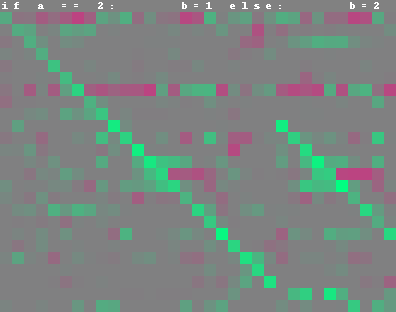

In [0]:
def visualize_neurons(neurons, code, act, cell_size=12):
    img = np.full((len(neurons) + 1, len(code), 3), 128)
    scores = (act[:, neurons].T + 1) / 2
    img[1:, :, 0] = 255 * (1 - scores)
    img[1:, :, 1] = 255 * scores

    f = BytesIO()
    img = scipy.misc.imresize(img, float(cell_size), interp='nearest')
    pil_img = PIL.Image.fromarray(img)
    draw = ImageDraw.Draw(pil_img)
    for idx, ch in enumerate(code):
        draw.text((idx * cell_size + 2, 0), ch)
    pil_img.save(f, 'png')
    return Image(data=f.getvalue())

img = visualize_neurons(neurons, example_code, act)
display(img)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


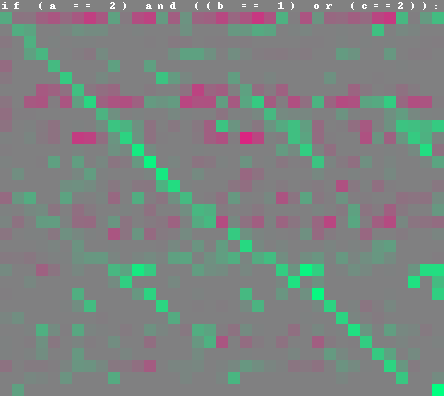

In [0]:
def image_for_code(code):
    act = activations(py_model, code)
    neurons = interesting_neurons(act)
    return visualize_neurons(neurons, code, act)

display(image_for_code('if (a == 2) and ((b == 1) or (c==2)):'))

In [0]:
code = 'if (a == 2) and ((b == 1) or (c==2)):'
mask = '   ________     ____________________ '
act = activations(py_model, code)
positive = [idx for idx, ch in enumerate(mask) if ch == '_']
negative = [idx for idx, ch in enumerate(mask) if ch != '_']

neurons = np.argsort(act[positive].sum(axis=0) - act[negative].sum(axis=0))[-5:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


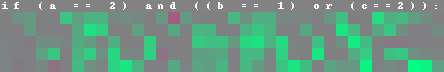

In [0]:
img = visualize_neurons(neurons, code, act)
display(img)

In [0]:
neurons

array([237, 117,  52, 197, 209])

In [0]:
act[negative, 108].sum()

0.03596913

In [0]:
x0 = 0
x1 = 0
for idx, ch in enumerate(mask):
    if ch == '_':
        x0 += act[idx, 108]
    else:
        x1 += act[idx, 108]
x0, x1

(0.3232587524689734, 0.035969129181467)